In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

breast_cancer_df = pd.read_csv('breast-cancer.csv')
covid_df = pd.read_csv('covid.csv')

In [3]:
## Function that gets the sexs

breast_cancer_sex_df = breast_cancer_df['Sex'].value_counts(dropna=False)
covid_sex_df = covid_df['Sex'].value_counts(dropna=False)

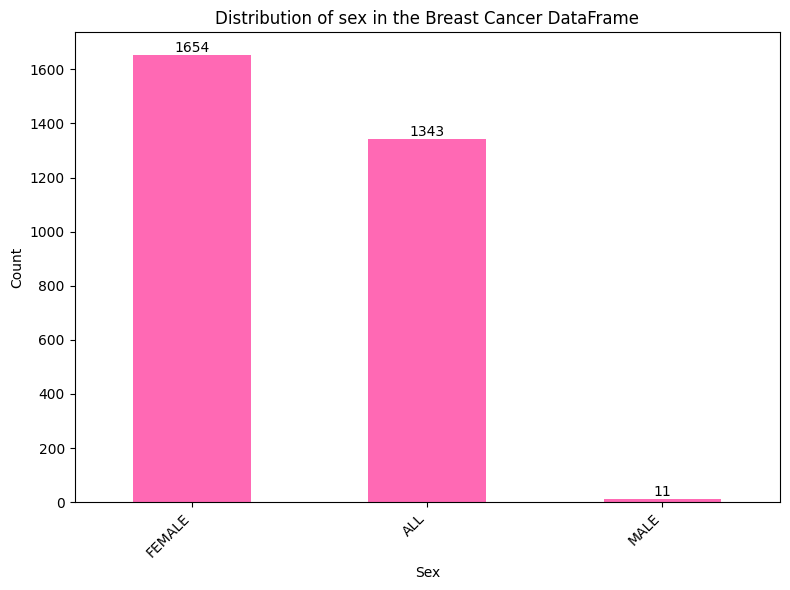

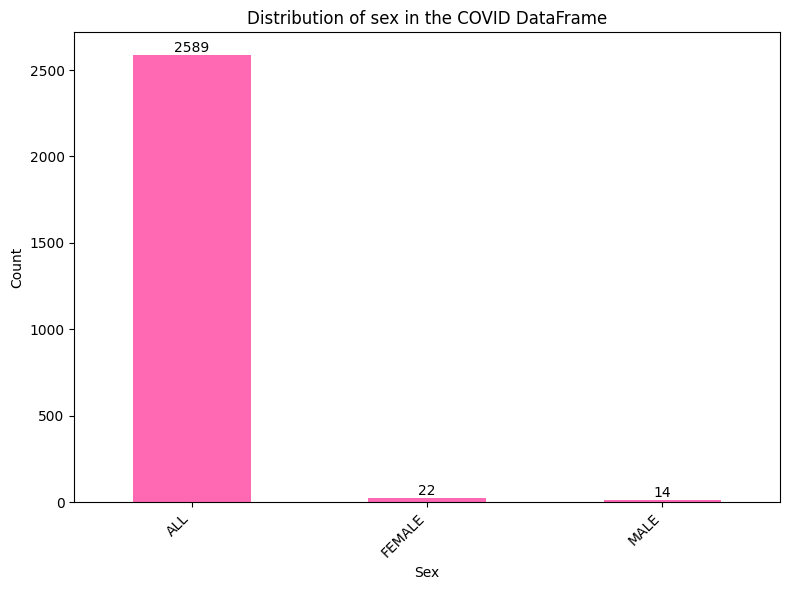

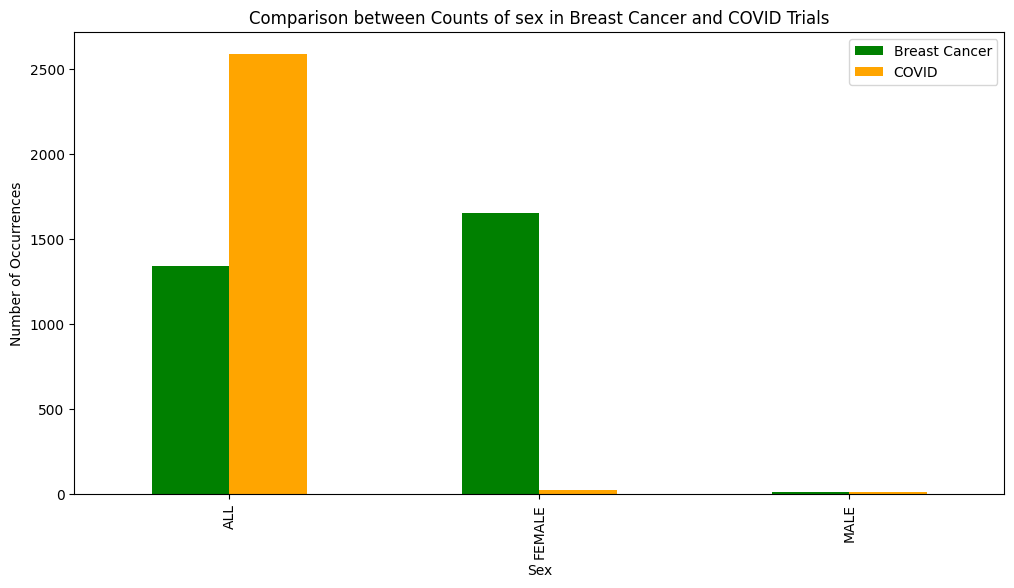

In [12]:
## sexs graphs
plt.figure(figsize=(8, 6))
bars = breast_cancer_sex_df.plot(kind='bar', color='hotpink')

for i, value in enumerate(breast_cancer_sex_df.values):
        bars.text(i, value, value, ha='center', va='bottom')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of sex in the Breast Cancer DataFrame')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Display the bar chart for breast cancer
plt.show()
##----
plt.figure(figsize=(8, 6))
bars = covid_sex_df.plot(kind='bar', color='hotpink')

for i, value in enumerate(covid_sex_df.values):
        bars.text(i, value, value, ha='center', va='bottom')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of sex in the COVID DataFrame')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Display the bar chart
plt.show()

## side by side
df1 = pd.DataFrame({'Breast Cancer': breast_cancer_sex_df, 'COVID': covid_sex_df})
df = df1.fillna(0)

df.plot(kind='bar', figsize=(12, 6), color=['green', 'orange'])

plt.title('Comparison between Counts of sex in Breast Cancer and COVID Trials')
plt.ylabel('Number of Occurrences')
plt.xlabel('Sex')

plt.show()


In [14]:
## Function that gets the age groups
def get_groups(df):
    cleaned_data = []

    # Iterate over each row
    for index, row in df.iterrows():
        groupings = row['Age'].split(', ')

        # Iterate over each intervention
        for group_type in groupings:
            cleaned_data.append({'trial_id': index, 'Type': group_type})

    cleaned_df = pd.DataFrame(cleaned_data)
    
    return (cleaned_df)
breast_cancer_groupings_df = get_groups(breast_cancer_df)
covid_groupings_df = get_groups(covid_df)

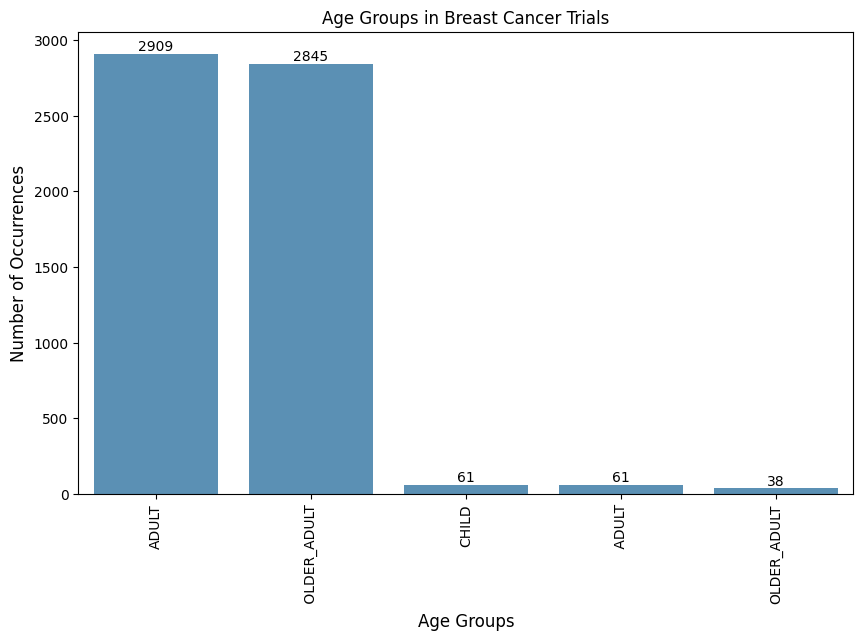

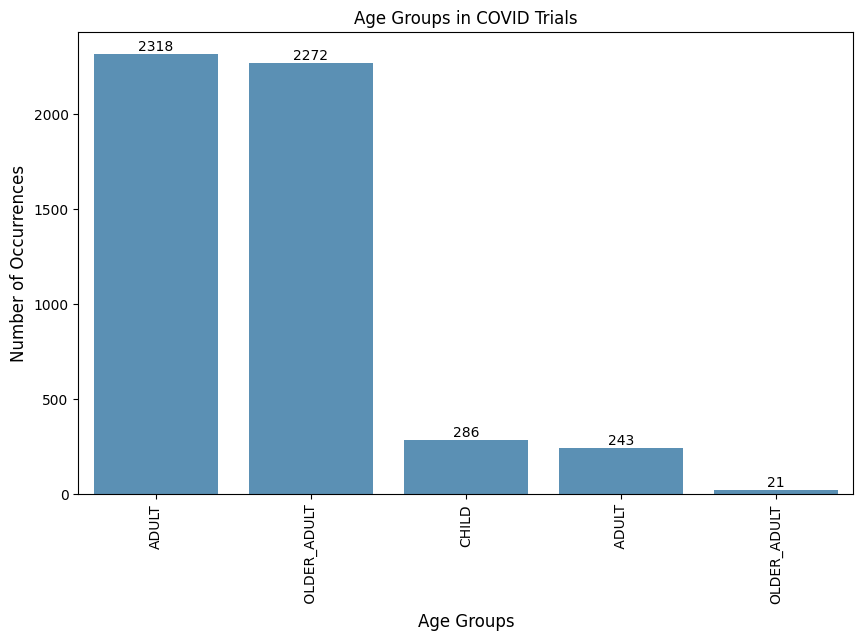

In [6]:
## Bar plot ##

def plot_age_groupings(df, title):
    # Count the frequency of each intervention type
    type_counts = df['Type'].value_counts()

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x=type_counts.index, y=type_counts.values, alpha=0.8)

    # Add the actual values on top of each bar
    for i, value in enumerate(type_counts.values):
        barplot.text(i, value, value, ha='center', va='bottom')

    plt.title(title)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Age Groups', fontsize=12)

    # Rotate x labels for better visibility
    plt.xticks(rotation=90)

    plt.show()
plot_age_groupings(breast_cancer_groupings_df, 'Age Groups in Breast Cancer Trials')
plot_age_groupings(covid_groupings_df, 'Age Groups in COVID Trials')


             Breast Cancer  COVID
Type                             
ADULT                 2970   2561
OLDER_ADULT           2883   2293
CHILD                   61    286


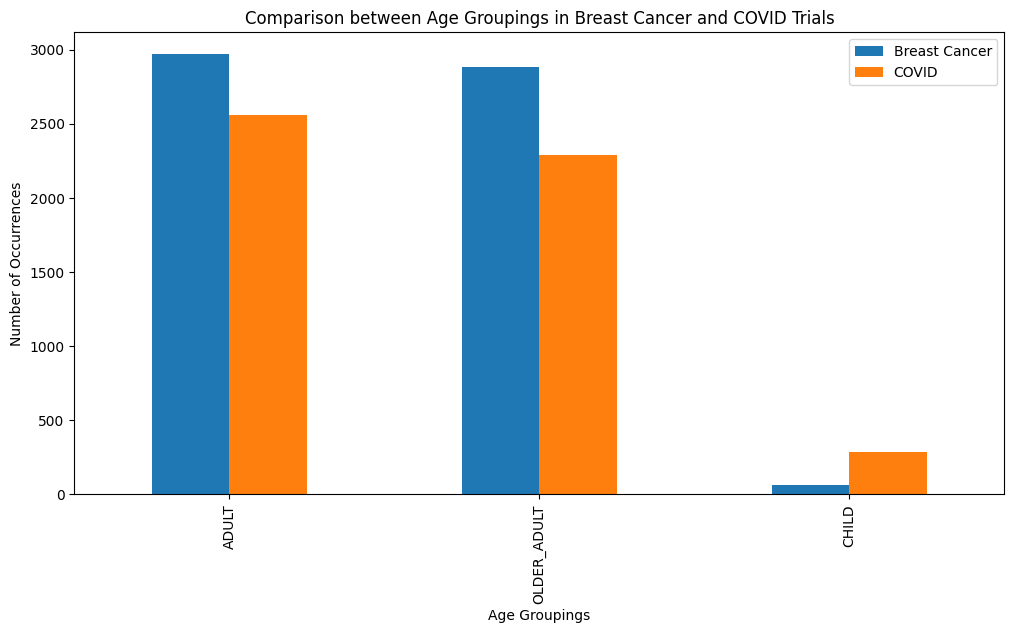

In [15]:
## Side by Side Bar Plot ##

# Count the frequency of each intervention type in each dataset
breast_cancer_GroupsType_count = breast_cancer_groupings_df['Type'].value_counts()
covid_GroupsType_count = covid_groupings_df['Type'].value_counts()

# Create a new DataFrame with these counts
df = pd.DataFrame({'Breast Cancer': breast_cancer_GroupsType_count, 'COVID': covid_GroupsType_count})
print(df)
df = df.sort_values(by='Breast Cancer', ascending=False)

# Fill NaN values with 0
df = df.fillna(0)

# Plot the DataFrame using pandas' built-in plot function
df.plot(kind='bar', figsize=(12, 6))

plt.title('Comparison between Age Groupings in Breast Cancer and COVID Trials')
plt.ylabel('Number of Occurrences')
plt.xlabel('Age Groupings')

plt.show()

In [23]:
## design dataframe cleaing
## Function that gets the designs
def get_designs(df):
    cleaned_data = []

    # Iterate over each row in the original dataframe
    for index, row in df.iterrows():
        designs = row['Study Design'].split('|')

        # Iterate over each intervention
        for design in designs:
            type_name = design.split(':')
            type = type_name[0].strip()
            name = type_name[1].strip()

            # Append the cleaned data to the new dataframe
            cleaned_data.append({'trial_id': index, 'Type': type, 'Name': name})

    cleaned_df = pd.DataFrame(cleaned_data)
    print(cleaned_df)
    return cleaned_df

breast_cancer_design_df = get_designs(breast_cancer_df)
covid_design_df = get_designs(covid_df)


       trial_id                Type                        Name
0             0          Allocation                          NA
1             0  Intervention Model                SINGLE_GROUP
2             0             Masking                        NONE
3             0     Primary Purpose                   SCREENING
4             1          Allocation                  RANDOMIZED
...         ...                 ...                         ...
12027      3006     Primary Purpose                   TREATMENT
12028      3007          Allocation                  RANDOMIZED
12029      3007  Intervention Model                    PARALLEL
12030      3007             Masking  SINGLE (OUTCOMES_ASSESSOR)
12031      3007     Primary Purpose                       OTHER

[12032 rows x 3 columns]
       trial_id                Type          Name
0             0          Allocation    RANDOMIZED
1             0  Intervention Model      PARALLEL
2             0             Masking          NONE
3     

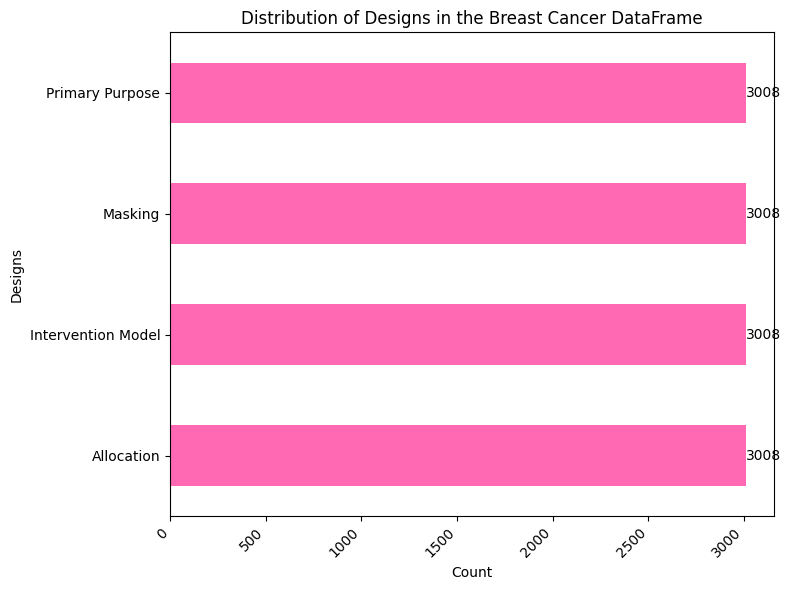

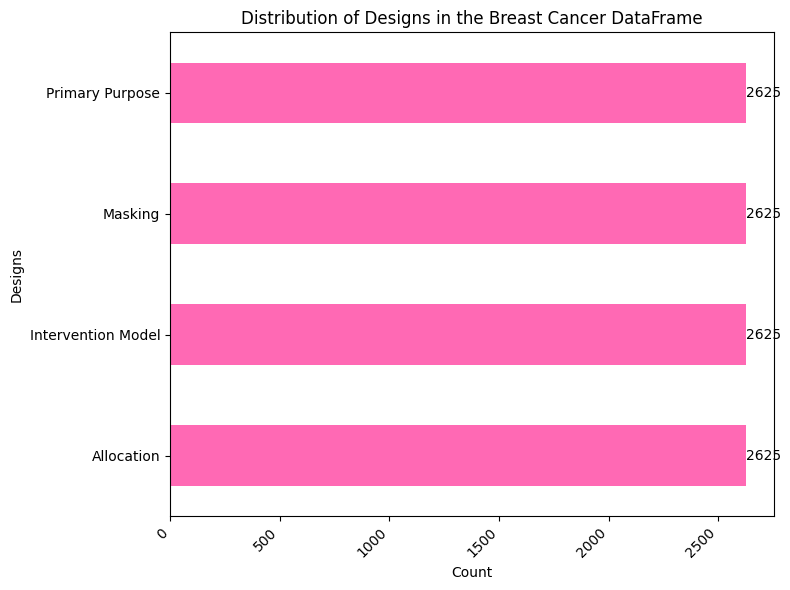

In [44]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a horizontal bar plot of design counts
bars = breast_cancer_design_df['Type'].value_counts().sort_values().plot(kind='barh', color='hotpink')

# Add labels and values on the right side of the bars
for i, value in enumerate(breast_cancer_design_df['Type'].value_counts().sort_values()):
    bars.text(value, i, str(value), ha='left', va='center')

plt.xlabel('Count')
plt.ylabel('Designs')
plt.title('Distribution of Designs in the Breast Cancer DataFrame')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
##----
plt.figure(figsize=(8, 6))

# Create a horizontal bar plot of design counts
bars = covid_design_df['Type'].value_counts().sort_values().plot(kind='barh', color='hotpink')

# Add labels and values on the right side of the bars
for i, value in enumerate(covid_design_df['Type'].value_counts().sort_values()):
    bars.text(value, i, str(value), ha='left', va='center')

plt.xlabel('Count')
plt.ylabel('Designs')
plt.title('Distribution of Designs in the Breast Cancer DataFrame')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

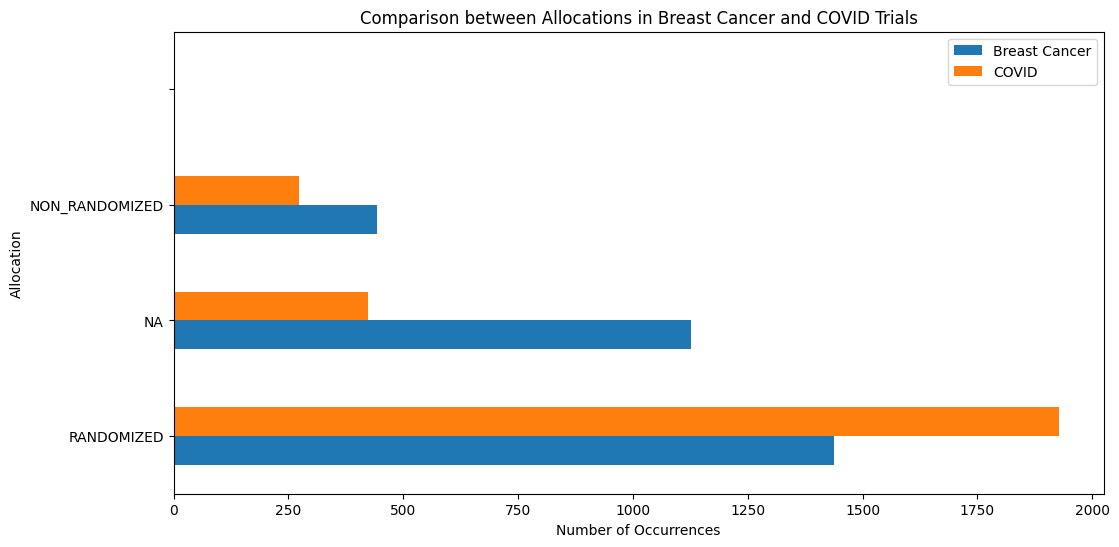

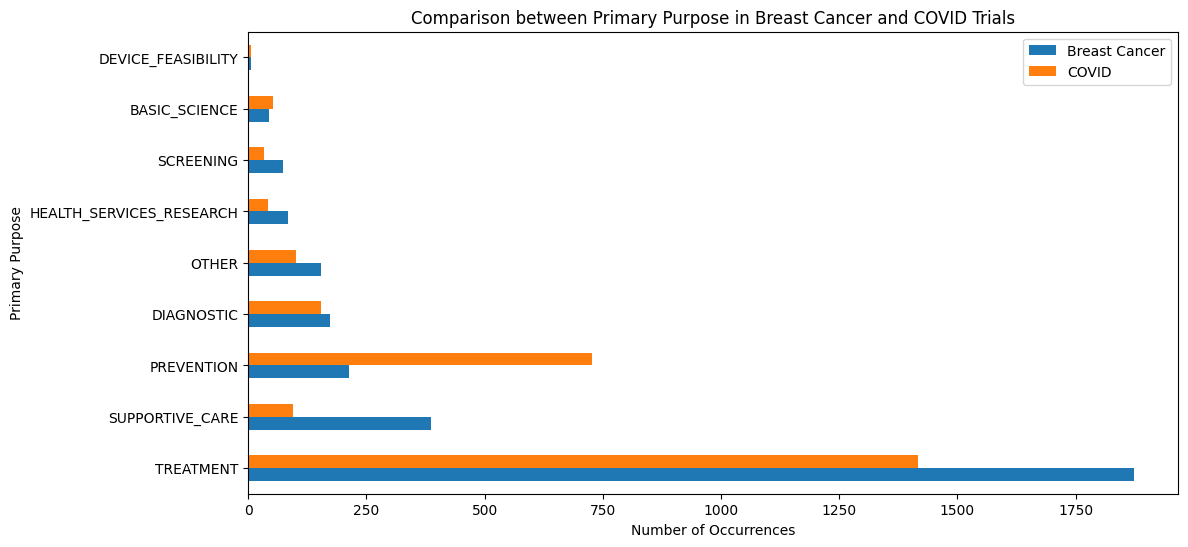

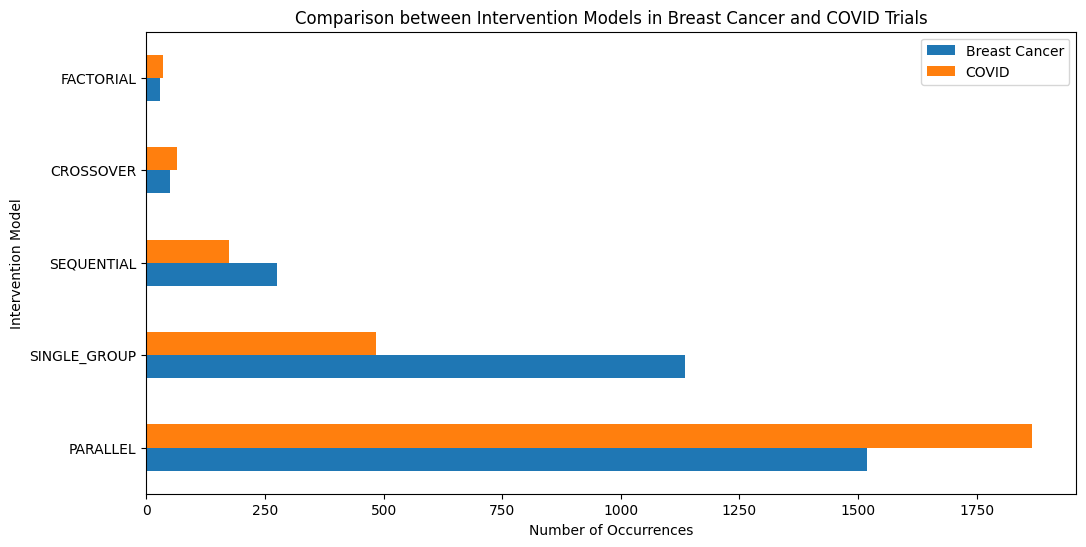

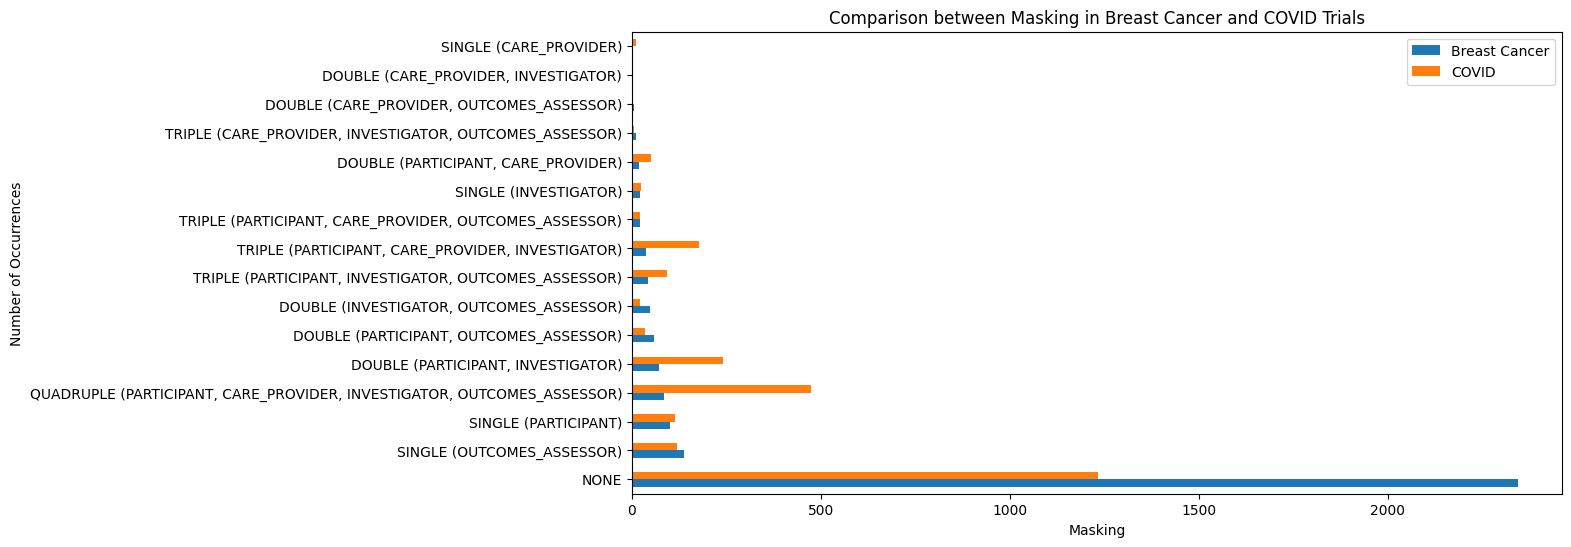

C:\Users\tgerr\AppData\Local\Temp\ipykernel_8256\1748435480.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Name'] = df1['Name'].str.replace(r'\(.*\)', '', regex=True)
C:\Users\tgerr\AppData\Local\Temp\ipykernel_8256\1748435480.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Name'] = df2['Name'].str.replace(r'\(.*\)', '', regex=True)


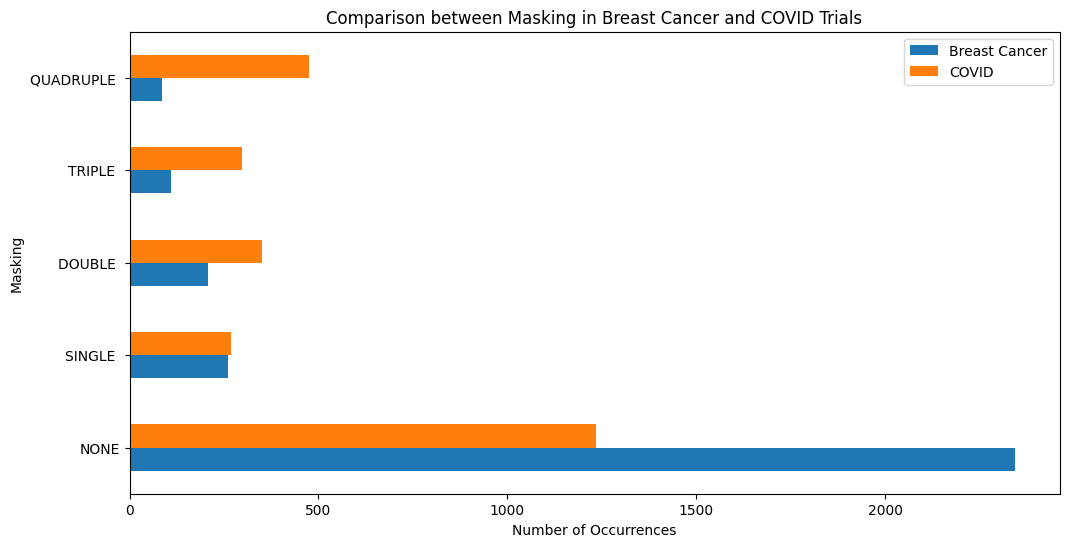

In [49]:
df1 = breast_cancer_design_df[breast_cancer_design_df['Type'] == 'Allocation']
df2 = covid_design_df[covid_design_df['Type'] == 'Allocation']
counts_bc = df1['Name'].value_counts().sort_index()
counts_covid = df2['Name'].value_counts().sort_index()
df = pd.DataFrame({'Breast Cancer': counts_bc, 'COVID': counts_covid})
df = df.fillna(0)
df = df.sort_values(by='Breast Cancer', ascending=False)
df.plot(kind='barh', figsize=(12, 6))
plt.title('Comparison between Allocations in Breast Cancer and COVID Trials')
plt.xlabel('Number of Occurrences')
plt.ylabel('Allocation')
plt.show()
##---
df1 = breast_cancer_design_df[breast_cancer_design_df['Type'] == 'Primary Purpose']
df2 = covid_design_df[covid_design_df['Type'] == 'Primary Purpose']
counts_bc = df1['Name'].value_counts().sort_index()
counts_covid = df2['Name'].value_counts().sort_index()
df = pd.DataFrame({'Breast Cancer': counts_bc, 'COVID': counts_covid})
df = df.fillna(0)
df = df.sort_values(by='Breast Cancer', ascending=False)
df.plot(kind='barh', figsize=(12, 6))
plt.title('Comparison between Primary Purpose in Breast Cancer and COVID Trials')
plt.xlabel('Number of Occurrences')
plt.ylabel('Primary Purpose')
plt.show()
##---
df1 = breast_cancer_design_df[breast_cancer_design_df['Type'] == 'Intervention Model']
df2 = covid_design_df[covid_design_df['Type'] == 'Intervention Model']
counts_bc = df1['Name'].value_counts().sort_index()
counts_covid = df2['Name'].value_counts().sort_index()
df = pd.DataFrame({'Breast Cancer': counts_bc, 'COVID': counts_covid})
df = df.fillna(0)
df = df.sort_values(by='Breast Cancer', ascending=False)
df.plot(kind='barh', figsize=(12, 6))
plt.title('Comparison between Intervention Models in Breast Cancer and COVID Trials')
plt.xlabel('Number of Occurrences')
plt.ylabel('Intervention Model')
plt.show()
##--
df1 = breast_cancer_design_df[breast_cancer_design_df['Type'] == 'Masking']
df2 = covid_design_df[covid_design_df['Type'] == 'Masking']
counts_bc = df1['Name'].value_counts().sort_index()
counts_covid = df2['Name'].value_counts().sort_index()
df = pd.DataFrame({'Breast Cancer': counts_bc, 'COVID': counts_covid})
df = df.fillna(0)
df = df.sort_values(by='Breast Cancer', ascending=False)
df.plot(kind='barh', figsize=(12, 6))
plt.title('Comparison between Masking in Breast Cancer and COVID Trials')
plt.ylabel('Number of Occurrences')
plt.xlabel('Masking')
plt.show()
##---
df1 = breast_cancer_design_df[breast_cancer_design_df['Type'] == 'Masking']
df1['Name'] = df1['Name'].str.replace(r'\(.*\)', '', regex=True)
df1 = df1[df1['Name'].str.strip() != '']

df2 = covid_design_df[covid_design_df['Type'] == 'Masking']
df2['Name'] = df2['Name'].str.replace(r'\(.*\)', '', regex=True)
df2 = df2[df2['Name'].str.strip() != '']

counts_bc = df1['Name'].value_counts().sort_index()
counts_covid = df2['Name'].value_counts().sort_index()

df = pd.DataFrame({'Breast Cancer': counts_bc, 'COVID': counts_covid})
df = df.fillna(0)
df = df.sort_values(by='Breast Cancer', ascending=False)

df.plot(kind='barh', figsize=(12, 6))

plt.title('Comparison between Masking in Breast Cancer and COVID Trials')
plt.xlabel('Number of Occurrences')
plt.ylabel('Masking')

plt.show()